<a href="https://colab.research.google.com/github/ann-macharia/IP-WEEK-8/blob/master/8_WEEK_8_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEFINING THE SOLUTION

### a) Specifying the Question

 Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.  

The main objective is to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroidism.


### b) Defining the Metric for Success

The metric for success in this project will be a well fitted and fairly accurate machine learning classification model, that will optimumly predict if a patient's symptoms indicate whether or not  the patient has hypothyroidism.

### c) Understanding the context 

The health sector in Kenya continues to embrace technological methods of diagnosing illnesses in patients. Machine learning methods, used to diagnose disease are being developed in our hospitals.  

This project is a case scenario of machine learning being used to solve health problems. A machine learning classification model, will be trained and deployed to predict whether or not the patient's symptoms indicate that the patient has hypothyroidism.

### d) Recording the Experimental Design

The main aim of the project is to create a predictive model for predict whether or not the patient's symptoms indicate that the patient has hypothyroidism. Data cleaning and exploratory data analysis will be done before creating the model and evaluation of the model and a final documentation of the project.

### e) Data Relevance

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. The features include patients' biodata, physical characteristics, past history of the patients etc. All the variables are relevant to predict whether a patient has hypothyroidism or not

# READING THE DATA

In [0]:
#Importing libraries.

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [0]:
df=pd.read_csv('/content/hypothyroid (1).csv')
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


# CHECKING THE DATA

In [0]:
# Determining the no. of records in our dataset
#
print(df.shape)

(3163, 26)


In [0]:
# Previewing the top of our dataset
#
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [0]:
# Previewing the bottom of our dataset
# 
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [0]:
# Checking whether each column has an appropriate datatype
#                  
#The some columns have question marks. We convert the question marks into null values.
#
def create_null(X):
  a = list(X.columns)
  for i in a:
    X[i] = X[i].replace('?', np.nan)
    

create_null(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          2717 non-null object
sex                          3090 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          2695 non-null object
T3_measured                  3163 non-null object
T3                           2468 non-null 

In [0]:
#Checking for null values
#
df.isnull().sum()

#some columns have many null values they will have to be dropped.
#
df = df.drop('TBG', 1)
df.shape

#Dropping the other null values
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 3162
Data columns (total 25 columns):
status                       2000 non-null object
age                          2000 non-null object
sex                          2000 non-null object
on_thyroxine                 2000 non-null object
query_on_thyroxine           2000 non-null object
on_antithyroid_medication    2000 non-null object
thyroid_surgery              2000 non-null object
query_hypothyroid            2000 non-null object
query_hyperthyroid           2000 non-null object
pregnant                     2000 non-null object
sick                         2000 non-null object
tumor                        2000 non-null object
lithium                      2000 non-null object
goitre                       2000 non-null object
TSH_measured                 2000 non-null object
TSH                          2000 non-null object
T3_measured                  2000 non-null object
T3                           2000 non-null 

In [0]:
#Ensuring that all data is the correct data type.
def create_null(X, columns):
  for i in columns:
    X[i] = pd.to_numeric(X[i], errors='coerce')
    
W = ['TT4', 'T3', 'T4U', 'TSH', 'age', 'FTI']
create_null(df, W)

df.info()
#data is in the correct order.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 3162
Data columns (total 25 columns):
status                       2000 non-null object
age                          2000 non-null int64
sex                          2000 non-null object
on_thyroxine                 2000 non-null object
query_on_thyroxine           2000 non-null object
on_antithyroid_medication    2000 non-null object
thyroid_surgery              2000 non-null object
query_hypothyroid            2000 non-null object
query_hyperthyroid           2000 non-null object
pregnant                     2000 non-null object
sick                         2000 non-null object
tumor                        2000 non-null object
lithium                      2000 non-null object
goitre                       2000 non-null object
TSH_measured                 2000 non-null object
TSH                          2000 non-null float64
T3_measured                  2000 non-null object
T3                           2000 non-null 

# EXPLORATORY DATA ANALYSIS

## Univariate Analysis

In [0]:
#data previewing.
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


Text(0.5, 0, 'status')

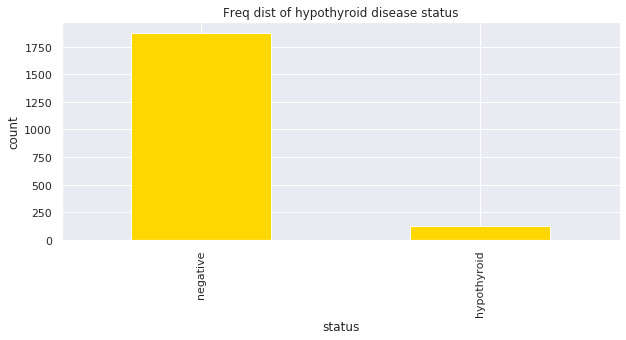

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 4)})

#Didtribution of the disease status.
df['status'].value_counts().plot.bar(title='Freq dist of hypothyroid disease status', color = 'gold')
plt.ylabel('count')
plt.xlabel('status')

From our data most people from whom the data was collected testes negative of the hypothyroid disease. In machine learning this data set is considered to be imbalanced, therefore while modelling this is a factor to look out for.

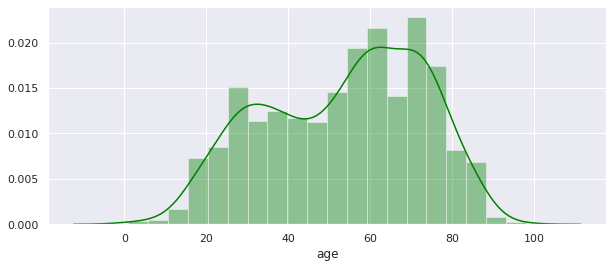

In [0]:
#Age distribution.
#
import seaborn as sns
sns.distplot( df['age'], bins=20, color = 'green')



The age distribution is skewed to the left. Most data was collected from people between ages 60-80. This can give us an incite of who are most prone to getting the hypothyroid disease, which from our data is people between the ages of 60 and 80, since most of them went to get tested.

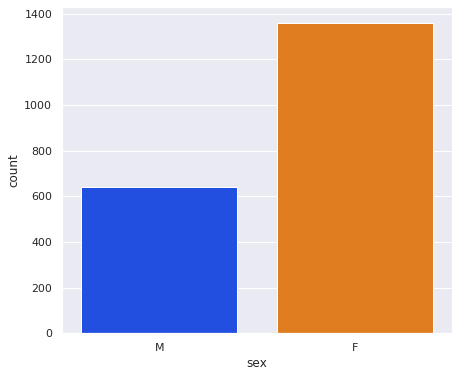

In [0]:
#sex frequency.
sns.set(rc={'figure.figsize':(7, 6)})
sns.set(style="darkgrid")
sns.countplot(x="sex", data=df, palette='bright')

And there we have it again, women taking the lead. More data was collected from the women compared to the men. With more analysis we will try and see if gender is a major factor exposing one to getting the hypothyroid disease

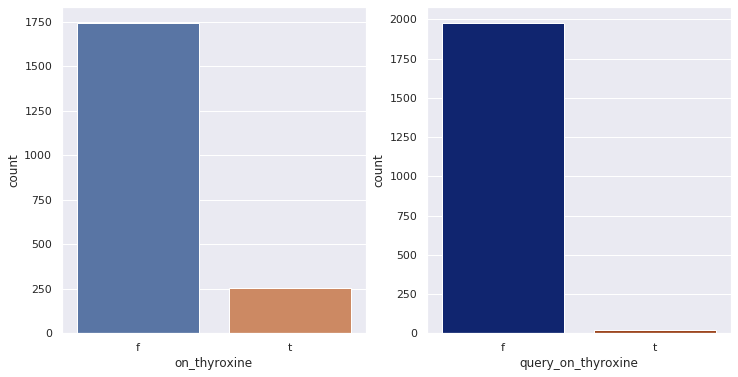

In [0]:
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax =plt.subplots(1,2)
sns.countplot(df['on_thyroxine'], ax=ax[0], palette = 'deep')
sns.countplot(df['query_on_thyroxine'], ax=ax[1], palette = 'dark')

fig.show()


In the distribution above,we can see that:

1) Many people are not on antithyroxine.

2) Most of the individuals do not have query_on_thyroxine.
This information owes to the fact that not many people have the thyroid condition


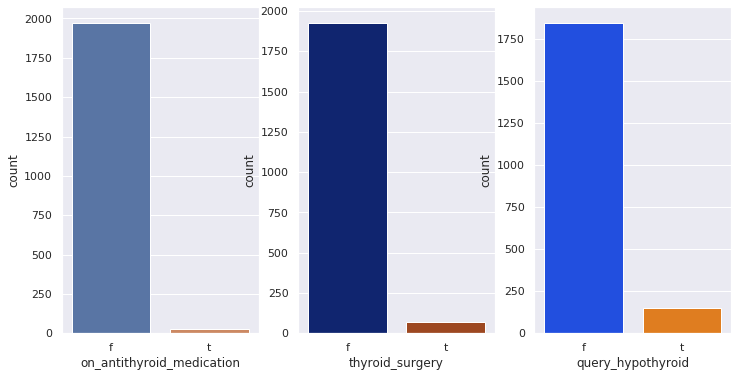

In [0]:
fig, ax =plt.subplots(1,3)
sns.countplot(df['on_antithyroid_medication'], ax=ax[0], palette = 'deep')
sns.countplot(df['thyroid_surgery'], ax=ax[1], palette = 'dark')
sns.countplot(df['query_hypothyroid'], ax=ax[2], palette = 'bright')
fig.show()


From the distribution above, it can be seen that:
1) Many people are not on antithyroid medication
2) Most of the individuals have not undergone thyroid surgery
3) Not many people have had queries on hypothyroid condition.
The reason for this could be due to hte fact that not many people have the hypothyroid illness.

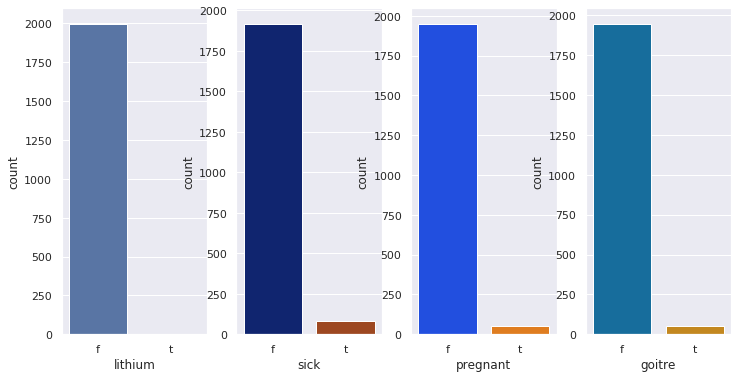

In [0]:
fig, ax =plt.subplots(1,4,)
sns.countplot(df['lithium'], ax=ax[0], palette = 'deep')
sns.countplot(df['sick'], ax=ax[1],palette = 'dark' )
sns.countplot(df['pregnant'], ax=ax[2], palette = 'bright')  
sns.countplot(df['goitre'], ax=ax[3], palette = 'colorblind')  
                                    

All patients had no lithium levels in them, very few people wew sick, not many people were pregnant and there were few people who had goitre.
This informatiion could also imply low prevalence of the disease.

## Bivariate Analysis

In [0]:
#previewing data
df.head()
df['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

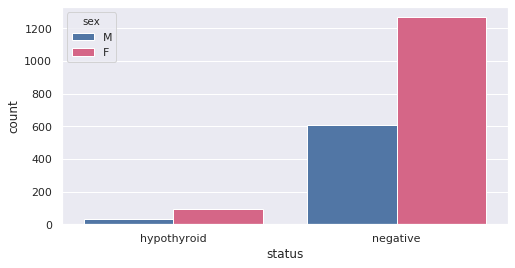

In [0]:
#Distribution os the hypothyroid disease in both genders.
#
sns.set(style="darkgrid")
colors = ["#4374B3", "#E75480"]
sns.set_palette(sns.color_palette(colors))
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x=df['status'], hue=df['sex'], data=df,orient="h", alpha=1)

This is a graph showing the hypothyroid disease distribution in both the males and the females. For the patients who tested positive, females were more, for those who tested negative females were also more.

This could be as a result of collecting more data on women than in men. To really know in what gender the disease is more prevalent, we can use percentages.

sex  status     
F    hypothyroid      92
     negative       1269
M    hypothyroid      30
     negative        609
Name: status, dtype: int64


([<matplotlib.patches.Wedge at 0x7f922626a358>,
 [Text(-0.23184781329743276, 1.0752890734445315, 'positive'),
  Text(0.2529249696046952, -1.1730426078154468, 'negative')],
 [Text(-0.1264624436167815, 0.5865213127879262, '6.8%'),
  Text(0.14753956560273884, -0.6842748545590106, '93.2%')])

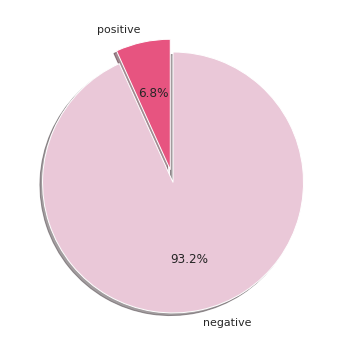

In [0]:
w=df.groupby (['sex','status'])['status'].count()
print(w)
# Pie chart for women distribution of the disease.
colors = ["#E75480", "#EAC8d8"]
sns.set_palette(sns.color_palette(colors))
labels = ['positive', 'negative']
sizes = [92, 1269]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

Out of all females tested, 6.8% tested positive  

([<matplotlib.patches.Wedge at 0x7f92261b64a8>,
 [Text(-0.16165428225456396, 1.0880569346448568, 'positive'),
  Text(0.176350070529755, -1.1869712096862968, 'negative')],
 [Text(-0.08817506304794398, 0.5934856007153763, '4.7%'),
  Text(0.10287087447569039, -0.6923998723170064, '95.3%')])

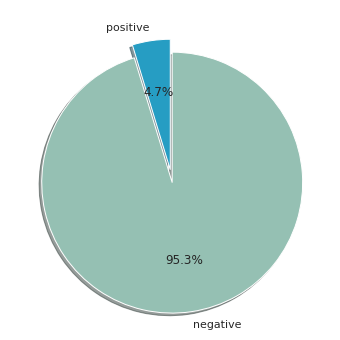

In [0]:
# Pie chart for women distribution of the disease.
colors = ["#269DC3", "#95C0B3"]
sns.set_palette(sns.color_palette(colors))
labels = ['positive', 'negative']
sizes = [30, 609]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

Out of all males tested, 4.7% tested positive.

Though the women are more than men, it is interesting to note the more women are affected by the disease compared to men.

## Multivariate Analysis

we will PCA to know the most important variables affecting the hypothyroid status.


In [0]:
# Split the independent and dependent variables
# We want to predict if someone has hypothyroidism or not.
# We label encode the status column.  
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
y = label_encoder.fit_transform(df['status']) 
y 
 
test_features = df.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
x = df[test_features]
x = pd.get_dummies(x)
X = x.values

In [0]:
#Separating the data into training and testing.
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
#Data normalisation
#
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [0]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.10401249e-01, 8.08023427e-02, 6.91827760e-02, 6.91026068e-02,
       6.70946301e-02, 6.45420565e-02, 6.35333423e-02, 6.14684398e-02,
       6.12473501e-02, 5.89448057e-02, 5.67241754e-02, 5.46701493e-02,
       4.76786169e-02, 4.41073681e-02, 3.38326776e-02, 2.34671779e-02,
       2.13654897e-02, 1.09808682e-02, 8.53877531e-04, 1.10427552e-32,
       1.06002152e-32, 4.66990052e-33, 1.23042261e-33, 8.96307046e-34,
       7.31384359e-34, 7.31384359e-34, 7.31384359e-34, 7.31384359e-34,
       7.31384359e-34, 7.31384359e-34, 7.31384359e-34, 7.31384359e-34,
       7.31384359e-34, 7.31384359e-34, 7.31384359e-34, 5.13353613e-34,
       4.49960568e-34])

There are 37 linear combinations of explained variances. They are arranges in order of highest explained variance. The variances are quite low which raises questions on whether data is appropriate to use in machine learning models.

In [0]:
# Visualising PCA Using two principal components
#
pca = PCA(n_components=2)
principals = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data =principals
             , columns = ['principal component 1', 'principal component 2'])


In [0]:
# Creating a new dataframe by concatination of the 2 principal components 
# and the independent variable.
#
finalDf = pd.concat([principalDf, df['status']], axis = 1)
finalDf.head()

,principal component 1,principal component 2,status
0,-1.998788,-0.600063,hypothyroid
1,-3.344301,-0.958740,hypothyroid
2,2.639959,-2.229942,hypothyroid
3,-0.356768,0.135406,hypothyroid
4,-0.141032,-0.490858,hypothyroid


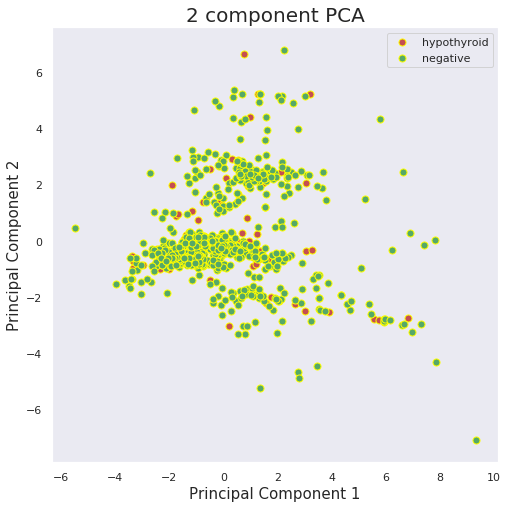

In [0]:
#Plotting the 2 principal components.
#
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['hypothyroid', 'negative']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['status'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50, edgecolors = 'yellow' )
ax.legend(targets)
ax.grid()

From the plot above, the classes are not well separaed from each other.

# IMPLEMENTING THE SOLUTION(PART 1)

## 1) Creating baseline model

In [0]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)
A =pd.DataFrame({'actual': y_test, 'predicted': y_pred})
A.head()

,actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [0]:
from sklearn import metrics
from sklearn.metrics import f1_score

# And now we assess the errors
a = f1_score(y_test, y_pred, average='micro')
print('F1_score, average = micro:',f1_score(y_test, y_pred, average='micro'))
a1 = f1_score(y_test, y_pred, average='macro')
print('F1_score, average = macro:',f1_score(y_test, y_pred, average='macro')) 
a2 = f1_score(y_test, y_pred, average='weighted') 
print('F1_score, average = weighted:',f1_score(y_test, y_pred, average='weighted'))


F1_score, average = micro: 0.9833333333333333
F1_score, average = macro: 0.929762127739277
F1_score, average = weighted: 0.9833333333333333


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,  y_pred))

[[ 33   5]
 [  5 557]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        38
           1       0.99      0.99      0.99       562

    accuracy                           0.98       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.98      0.98      0.98       600



### Conclusion on the baseline model

The baseline logistics model performed well. Model achieved an f1 sscore of 98.3% accuracy in prediction . The model has a very low bias but there could be a high chance of overfitting leading to high variance. 
Cross validation can be used to check for the variance.

The baseline model predicted 33 positive hypothyroid cases correctly and 5 wrongly.
It also predicted 557 negative hypothyroid cases correctly and 5 wrongly.

## 2) Random forest model

In [0]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 300, random_state=42, min_samples_split = 3, max_depth=12)
forest = forest.fit(X_train, y_train)

In [0]:
#predicting using the random forest model.
# Predict based on the model we've trained
y_pred_rf = forest.predict(X_test)
B=pd.DataFrame({'actual': y_test, 'predicted': y_pred_rf})
B.head()


,actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [0]:
#Model evaluation.
#
b = f1_score(y_test, y_pred_rf, average='micro')
print('F1_score, average = micro:',f1_score(y_test, y_pred_rf, average='micro'))
b1 = f1_score(y_test, y_pred_rf, average='macro')
print('F1_score, average = macro:',f1_score(y_test, y_pred_rf, average='macro')) 
b2 = f1_score(y_test, y_pred_rf, average='weighted') 
print('F1_score, average = weighted:',f1_score(y_test, y_pred_rf, average='weighted'))


F1_score, average = micro: 0.98
F1_score, average = macro: 0.9113475177304964
F1_score, average = weighted: 0.9794799054373522


In [0]:
#model evaluation
#
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test,  y_pred_rf))

[[ 30   8]
 [  4 558]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        38
           1       0.99      0.99      0.99       562

    accuracy                           0.98       600
   macro avg       0.93      0.89      0.91       600
weighted avg       0.98      0.98      0.98       600



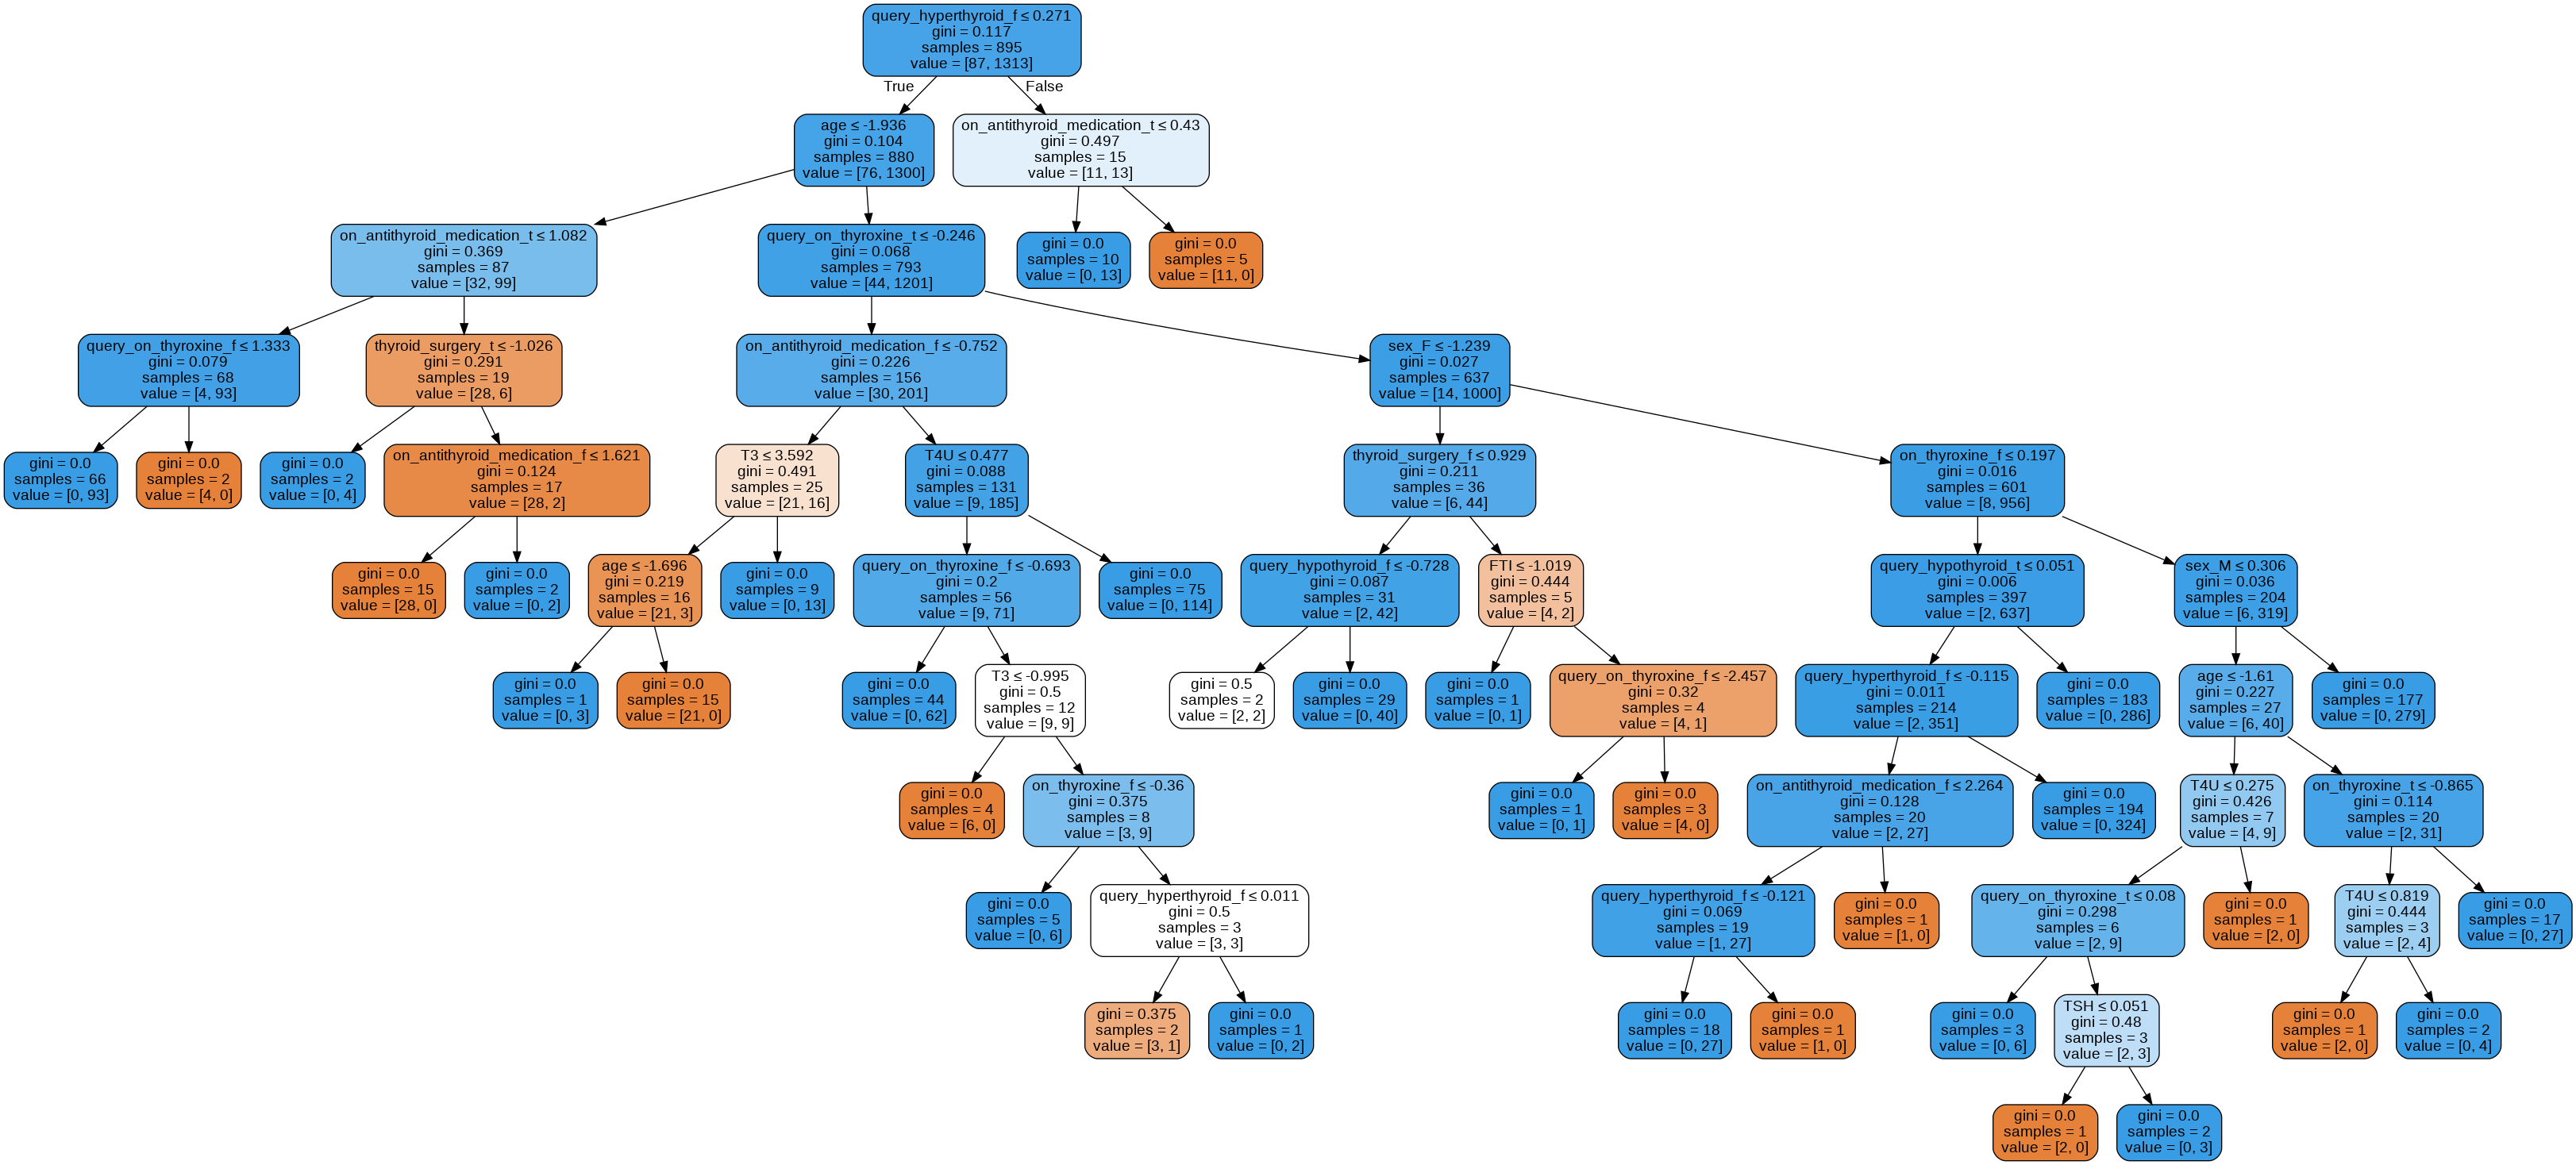

In [0]:
#Visualisation of the model with one random tree.
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

test_features_X = x.columns.to_list()

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[24]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features_X)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('absenteism_forest.png')
Image(graph.create_png())


In [0]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features_X, importances)]

print(feature_importances) 
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.1), ('TSH', 0.02), ('T3', 0.11), ('TT4', 0.0), ('T4U', 0.04), ('FTI', 0.01), ('sex_F', 0.01), ('sex_M', 0.01), ('on_thyroxine_f', 0.01), ('on_thyroxine_t', 0.01), ('query_on_thyroxine_f', 0.1), ('query_on_thyroxine_t', 0.04), ('on_antithyroid_medication_f', 0.14), ('on_antithyroid_medication_t', 0.27), ('thyroid_surgery_f', 0.03), ('thyroid_surgery_t', 0.04), ('query_hypothyroid_f', 0.01), ('query_hypothyroid_t', 0.0), ('query_hyperthyroid_f', 0.07), ('query_hyperthyroid_t', 0.0), ('pregnant_f', 0.0), ('pregnant_t', 0.0), ('sick_f', 0.0), ('sick_t', 0.0), ('tumor_f', 0.0), ('tumor_t', 0.0), ('lithium_f', 0.0), ('lithium_t', 0.0), ('goitre_f', 0.0), ('goitre_t', 0.0), ('TSH_measured_y', 0.0), ('T3_measured_y', 0.0), ('TT4_measured_y', 0.0), ('T4U_measured_y', 0.0), ('FTI_measured_y', 0.0), ('TBG_measured_n', 0.0), ('TBG_measured_y', 0.0)]

Variable: on_antithyroid_medication_t Importance: 0.27
Variable: on_antithyroid_medication_f Importance: 0.14
Variable: T3                

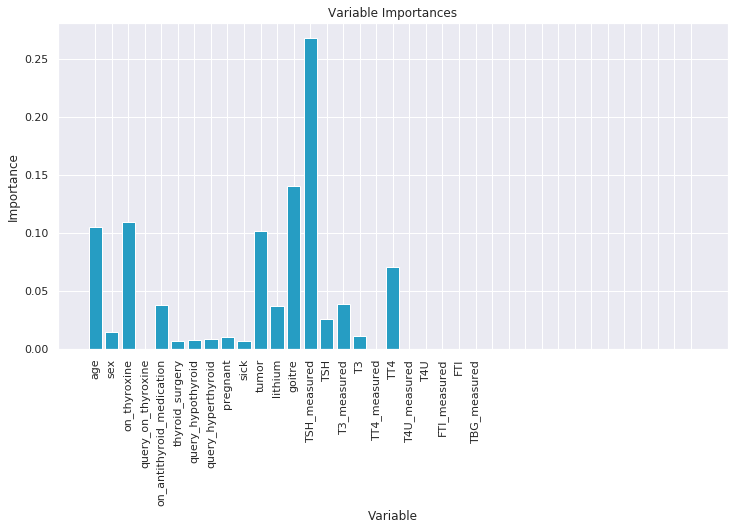

In [0]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', )
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


### Adaboost optimisation.

In [0]:
#Fitting ada boost regressor with default parameters.

from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier()

ada_boost = ada_boost.fit(X_train, y_train)

In [0]:
#Making predictions
#
y_pred_ada = ada_boost.predict(X_test)
C = pd.DataFrame({'actual': y_test, 'predicted': y_pred_ada})
C.head()

,actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [0]:


# And now we assess
c = f1_score(y_test, y_pred_ada, average='micro')
print('F1_score, average = micro:',f1_score(y_test, y_pred_ada, average='micro'))
c1 = f1_score(y_test, y_pred_ada, average='macro')
print('F1_score, average = macro:',f1_score(y_test, y_pred_ada, average='macro')) 
c2 = f1_score(y_test, y_pred_ada, average='weighted') 
print('F1_score, average = weighted:',f1_score(y_test, y_pred_ada, average='weighted'))


F1_score, average = micro: 0.985
F1_score, average = macro: 0.9359999999999999
F1_score, average = weighted: 0.9849066666666666


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test,  y_pred_ada))

[[ 33   5]
 [  4 558]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        38
           1       0.99      0.99      0.99       562

    accuracy                           0.98       600
   macro avg       0.94      0.93      0.94       600
weighted avg       0.98      0.98      0.98       600



The adaboost model, perfomed better  than the random forest model and the baseline logistics model. Tweaking  the parameters caused a change in the performance. increasing number of estimators, made model perform better. This also happened when max_depth was increased and min_sample_split was reduced.

Since trial and error method of choosing parameters could not forever, we will use hyperparameter tuning

Adaboost with hyperparameter tuning

In [0]:
#Hyperparameter tuning
#
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'n_estimators': [50, 300],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]
 }

pre_gs_inst = RandomizedSearchCV(AdaBoostClassifier(),
 param_distributions = param_dist, 
 cv=3,
 n_iter = 10,
 n_jobs=-1, random_state = 42)

pre_gs_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'n_estimators': [50, 300]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [0]:
pre_gs_inst.best_params_

{'learning_rate': 0.3, 'n_estimators': 300}

In [0]:
#Fitting ada boost regressor
ada_boost = AdaBoostClassifier(n_estimators=300, random_state=42, learning_rate = 0.3)

ada_boost = ada_boost.fit(X_train, y_train)

In [0]:
#Making predictions
#
y_pred_adat = ada_boost.predict(X_test)
C_adat = pd.DataFrame({'actual': y_test, 'predicted': y_pred_adat})
C_adat.head()

,actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [0]:
c_adat = f1_score(y_test, y_pred_adat, average='micro')
print('F1_score, average = micro:',f1_score(y_test,y_pred_adat, average='micro'))
c1_adat = f1_score(y_test, y_pred_adat, average='macro')
print('F1_score, average = macro:',f1_score(y_test, y_pred_adat, average='macro')) 
c2_adat = f1_score(y_test, y_pred_adat, average='weighted') 
print('F1_score, average = weighted:',f1_score(y_test, y_pred_adat, average='weighted'))


F1_score, average = micro: 0.9833333333333333
F1_score, average = macro: 0.9261229314420804
F1_score, average = weighted: 0.9828999211977936


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_adat))
print(classification_report(y_test,  y_pred_adat))

[[ 31   7]
 [  3 559]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        38
           1       0.99      0.99      0.99       562

    accuracy                           0.98       600
   macro avg       0.95      0.91      0.93       600
weighted avg       0.98      0.98      0.98       600



Hyperparameter tuning caused the model to have a higher precision.


### Gradient boost optimsation

In [0]:
# training the Gboost model with default parameters.
#
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier()
gbr = gbr.fit(X_train, y_train)


In [0]:
#Making predictions
#
y_pred_gbr = gbr.predict(X_test)
D = pd.DataFrame({'actual': y_test, 'predicted': y_pred_gbr})
D.head()

,actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [0]:
d = f1_score(y_test, y_pred_gbr, average='micro')
print('F1_score, average = micro:',f1_score(y_test,y_pred_gbr, average='micro'))
d1 = f1_score(y_test, y_pred_gbr, average='macro')
print('F1_score, average = macro:',f1_score(y_test, y_pred_gbr, average='macro')) 
d2 = f1_score(y_test, y_pred_gbr, average='weighted') 
print('F1_score, average = weighted:',f1_score(y_test, y_pred_gbr, average='weighted'))


F1_score, average = micro: 0.975
F1_score, average = macro: 0.8933333333333333
F1_score, average = weighted: 0.9748444444444444


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_gbr))
print(classification_report(y_test,  y_pred_gbr))

[[ 30   8]
 [  7 555]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        38
           1       0.99      0.99      0.99       562

    accuracy                           0.97       600
   macro avg       0.90      0.89      0.89       600
weighted avg       0.97      0.97      0.97       600



The Gradient boost model also perfomed better  than the random forest model and the baseline logistics model, but not the adaboost model. Tweaking the parameters caused a change in the performance. increasing number of estimators, made model perform better. This also happened when max_depth was increased and learning rate changed

Since trial and error method of choosing parameters could not forever, we will use hyperparameter tuning

Gradient boost with hyperparameter tuning.

In [178]:
import numpy as np

param_dist = {
 'n_estimators': [50, 300],
 'learning_rate' :[0.01,0.05,0.1,0.3,1],
 'max_depth': [1,2,3,4,5,6,7,8,9,10]
 }

pre_gbr_inst = RandomizedSearchCV(GradientBoostingClassifier(),
 param_distributions = param_dist,
 cv=6,
 n_iter = 10,
 n_jobs=-1, random_state = 42)

pre_gbr_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [0]:
pre_gbr_inst.best_params_


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

In [0]:
# training the model with Gboost
#
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3)
gbr = gbr.fit(X_train, y_train)


In [0]:
#Making predictions
#
y_pred_gbrt = gbr.predict(X_test)
D = pd.DataFrame({'actual': y_test, 'predicted': y_pred_gbrt})
D.head()

,actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [0]:

d_gbrt = f1_score(y_test, y_pred_gbrt, average='micro')
print('F1_score, average = micro:',f1_score(y_test,y_pred_gbrt, average='micro'))
d1_gbrt = f1_score(y_test, y_pred_gbrt, average='macro')
print('F1_score, average = macro:',f1_score(y_test, y_pred_gbrt, average='macro')) 
d2_gbrt = f1_score(y_test, y_pred_gbrt, average='weighted') 
print('F1_score, average = weighted:',f1_score(y_test, y_pred_gbrt, average='weighted'))



F1_score, average = micro: 0.9766666666666667
F1_score, average = macro: 0.8991887091354233
F1_score, average = weighted: 0.9763720736722515


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_gbrt))
print(classification_report(y_test,  y_pred_gbrt))

[[ 30   8]
 [  6 556]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        38
           1       0.99      0.99      0.99       562

    accuracy                           0.98       600
   macro avg       0.91      0.89      0.90       600
weighted avg       0.98      0.98      0.98       600



### Conclusion on part 1

Below is a compilation of performance all the models that have been trained in part 1

In [179]:
#Models vs r2 score.
models = ['logistics','random_forest', 'adaboost', 'gradient_search', 'adaboost_tuned', 'gradient_search_tuned']
f1_scores = [a1,b1,c1,d1,c1_adat,d1_gbrt]
conc_prt1 = pd.DataFrame({'models': models, 'f1_score': f1_scores})
conc_prt1

,models,f1_score
0,logistics,0.929762
1,random_forest,0.911348
2,adaboost,0.936000
3,gradient_search,0.893333
4,adaboost_tuned,0.926123
5,gradient_search_tuned,0.899189


All the models performed really well. The adaboost performed best with an f1 score of 0.936. 

with autotuning the adaboost performed worse meaning that choosen parameteres were no better than the default parameters.

The Gradient boost had an f1_score of 0.893. Hyperparameter tuning boosted the the f1 score to 0.899. This means better parameters were chosen.


#IMPLEMENTING THE SOLUTION(PART 2)

## SVM

## Data preparation

In [181]:
#SVM requires the data to be clean so cleaning procedures will be done.
df1 = df

#Previewing the data set.
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 3162
Data columns (total 25 columns):
status                       2000 non-null object
age                          2000 non-null int64
sex                          2000 non-null object
on_thyroxine                 2000 non-null object
query_on_thyroxine           2000 non-null object
on_antithyroid_medication    2000 non-null object
thyroid_surgery              2000 non-null object
query_hypothyroid            2000 non-null object
query_hyperthyroid           2000 non-null object
pregnant                     2000 non-null object
sick                         2000 non-null object
tumor                        2000 non-null object
lithium                      2000 non-null object
goitre                       2000 non-null object
TSH_measured                 2000 non-null object
TSH                          2000 non-null float64
T3_measured                  2000 non-null object
T3                           2000 non-null 

In [182]:
#Dropping the outliers
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Selecting data that is not in the outliers zone.
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df2

df2.shape

(1473, 25)

Data transformation:

After dropping the outliers, we are left with 1473 rows of data

In [183]:
#Selecting the independent variables.
#We store the names of the independent features in variable 'test_features_df1'.
test_features_df2 = df2.columns.to_list()
test_features_df2.remove('status')

#One_hot encoding the independent variables.
x = df2[test_features_df2]
x
for i in test_features_df2:
  x[i]= label_encoder.fit_transform(x[i]) 


# Selecting the dependent variable
y = df2['status']



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [184]:
# Applying the reduction algorithm: PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x)
X = pca.transform(x)
X.shape

(1473, 2)

In [185]:
# Convert the data type for 'Class' column from object to category
y = y.astype('category')

# Convert each value in the 'Type' column into a number. This will be our target column
y =y.cat.codes
y.unique()


array([0, 1])

In [0]:
#Splitting data into training and testing.
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


## Linear Kernel

In [187]:
from sklearn.svm import SVC
# Fit the SVM model with a linear kernel.
#
linear_model = SVC(kernel= 'linear')

# Training the model using the training set
#
linear_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

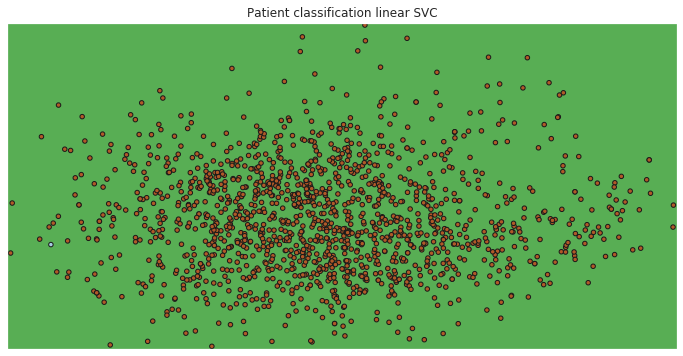

In [188]:

#Visualisation.
# Create a mesh grid for our graph
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = linear_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Patient classification linear SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, linear_model, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [189]:
#Making predictions
# making prediction
y_pred_lsvm = linear_model.predict(X_test)
F = pd.DataFrame({'actual': y_test, 'predicted': y_pred_lsvm})
F.head()

,actual,predicted
2444,1,1
2512,1,1
1067,1,1
1944,1,1
1096,1,1


In [190]:
#Model evaluation.
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_lsvm))
print(classification_report(y_test, y_pred_lsvm))

[[295]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       295

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



## Polynomial Kernel

In [191]:
# Building the model 
polyclassifier = SVC(kernel='poly')

# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [193]:
#Making predictions
# making prediction
y_pred_lpoly = polyclassifier.predict(X_test)
G = pd.DataFrame({'actual': y_test, 'predicted': y_pred_lpoly})
G.head()

,actual,predicted
2444,1,1
2512,1,1
1067,1,1
1944,1,1
1096,1,1


In [222]:
from sklearn.metrics import confusion_matrix,accuracy_score
print( accuracy_score(y_test, y_pred_lpoly))
print(confusion_matrix(y_test, y_pred_lpoly))


1.0
[[295]]


## RBF Kernel

In [224]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

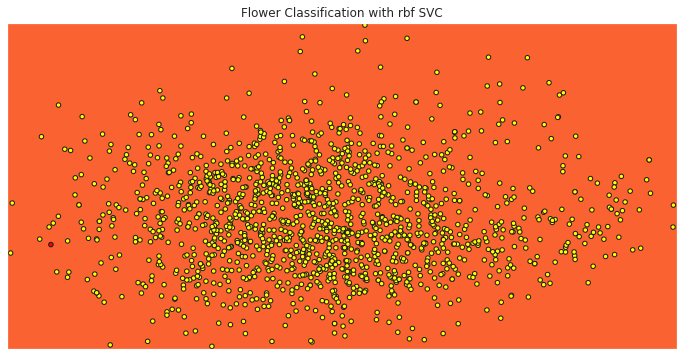

In [225]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [226]:
#Making predictions
# making prediction
y_pred_lrbf = polyclassifier.predict(X_test)
H = pd.DataFrame({'actual': y_test, 'predicted': y_pred_lrbf})
H.head()

,actual,predicted
2444,1,1
2512,1,1
1067,1,1
1944,1,1
1096,1,1


In [227]:
from sklearn.metrics import confusion_matrix,accuracy_score
print( accuracy_score(y_test, y_pred_lrbf))
print(confusion_matrix(y_test, y_pred_lrbf))

1.0
[[295]]


## Hyperparameter tuning

SVM with hyperparametre tuning. 

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

param_grid = {'C': (0.001, 0.01, 0.1, 1, 10),
              'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
              'class_weight': ('balanced', None),
              'gamma' : ('scale', 'auto'),
              'shrinking': (True, False)}

grid_search = GridSearchCV(SVC, param_grid, cv=3)

In [0]:
# grid_search.fit(X_train, y_train)


# print(grid_search.best_score_)
# print(grid_search.best_estimator_)
# print(grid_search.best_params_)

In [219]:
svm_model = SVC(random_state = 42, C = 10, class_weight = 'balanced', gamma = 'scale', kernel = 'poly', shrinking = True, )
# Train the model using the training set
#
svm_model.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [220]:
# Predict the response for the test set
y_pred_svm = svm_model.predict(X_test)
E = pd.DataFrame({'actual': y_test, 'predicted': y_pred_svm})
E.head()

,actual,predicted
2444,1,1
2512,1,1
1067,1,1
1944,1,1
1096,1,1


In [221]:
from sklearn.metrics import confusion_matrix,accuracy_score
print( accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

0.9932203389830508
[[  0   0]
 [  2 293]]


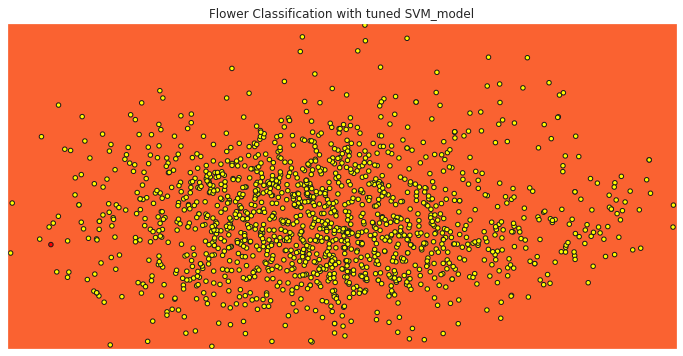

In [0]:
#visualisation.
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with tuned SVM_model')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_model, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()


## 8. Challenging the solution

> The models are highly accurate which could lead to overfitting. Regularisation need be done to have an optimal model.




